# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [7]:
# loading the data:
Wholesale_data = pd.read_csv('/home/davidgozalo/Ironhack/dataptmad0420/module-3/unsupervised-learning/data/Wholesale customers data.csv')
display (Wholesale_customers_data)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [8]:
Wholesale_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [9]:
Wholesale_data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


<AxesSubplot:>

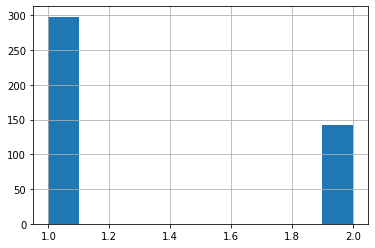

In [12]:
Wholesale_data['Channel'].hist()

In [27]:
Wholesale_data['Region'].value_counts().sort_index()

1     77
2     47
3    316
Name: Region, dtype: int64

In [14]:
Wholesale_data['Channel'].value_counts()

1    298
2    142
Name: Channel, dtype: int64

<AxesSubplot:>

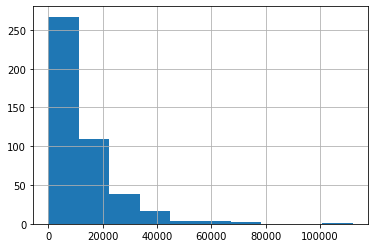

In [15]:
Wholesale_data['Fresh'].hist()

<AxesSubplot:>

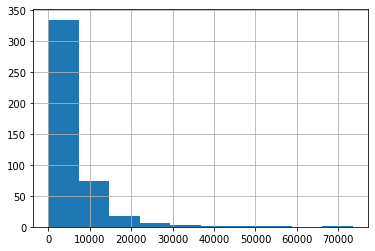

In [22]:
Wholesale_data['Milk'].hist()

<AxesSubplot:>

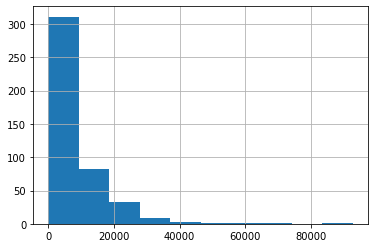

In [21]:
Wholesale_data['Grocery'].hist()

<AxesSubplot:>

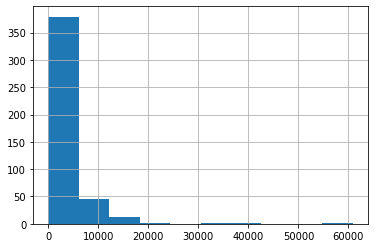

In [20]:
Wholesale_data['Frozen'].hist()

<AxesSubplot:>

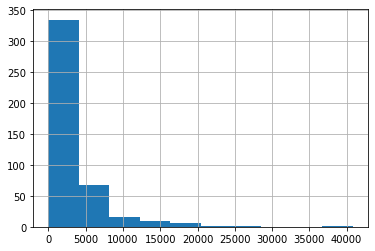

In [18]:
Wholesale_data['Detergents_Paper'].hist()

<AxesSubplot:>

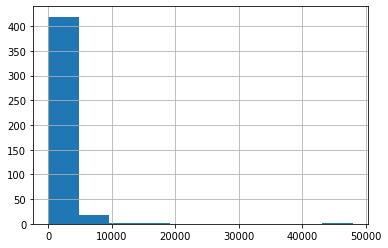

In [17]:
Wholesale_data['Delicassen'].hist()

In [24]:
Wholesale_data.isnull().astype(int)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
435,0,0,0,0,0,0,0,0
436,0,0,0,0,0,0,0,0
437,0,0,0,0,0,0,0,0
438,0,0,0,0,0,0,0,0


In [25]:
Wholesale_data.isnull().values.any()

False

In [ ]:
'''
1) FRESH: annual spending (m.u.) on fresh products (Continuous);
2) MILK: annual spending (m.u.) on milk products (Continuous);
3) GROCERY: annual spending (m.u.)on grocery products (Continuous);
4) FROZEN: annual spending (m.u.)on frozen products (Continuous)
5) DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous)
6) DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous);
7) CHANNEL: customersâ€™ Channel - Horeca (Hotel/Restaurant/CafÃ©) or Retail channel (Nominal)
8) REGION: customersâ€™ Region â€“ Lisnon, Oporto or Other (Nominal)


REGION Frequency
Lisbon 77
Oporto 47
Other Region 316
Total 440

1     77
2     47
3    316


CHANNEL Frequency
Horeca 298
Retail 142
Total 440

1    298
2    142


In [28]:
Wholesale_data.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [29]:
NUM_FEATS=['Fresh', 'Milk', 'Grocery', 'Frozen','Detergents_Paper', 'Delicassen']

In [36]:
a=-1
for data in NUM_FEATS:
    a=a+1
    print(f'{a}: {data}')

0: Fresh
1: Milk
2: Grocery
3: Frozen
4: Detergents_Paper
5: Delicassen


In [32]:
var_list=[]
var={}
for data in NUM_FEATS:
    var[data]=Wholesale_data[data].values
    var_list.append(var[data])

In [33]:
var_array=np.array(var_list)

In [34]:
covMatrix = np.cov(var_array,bias=True)

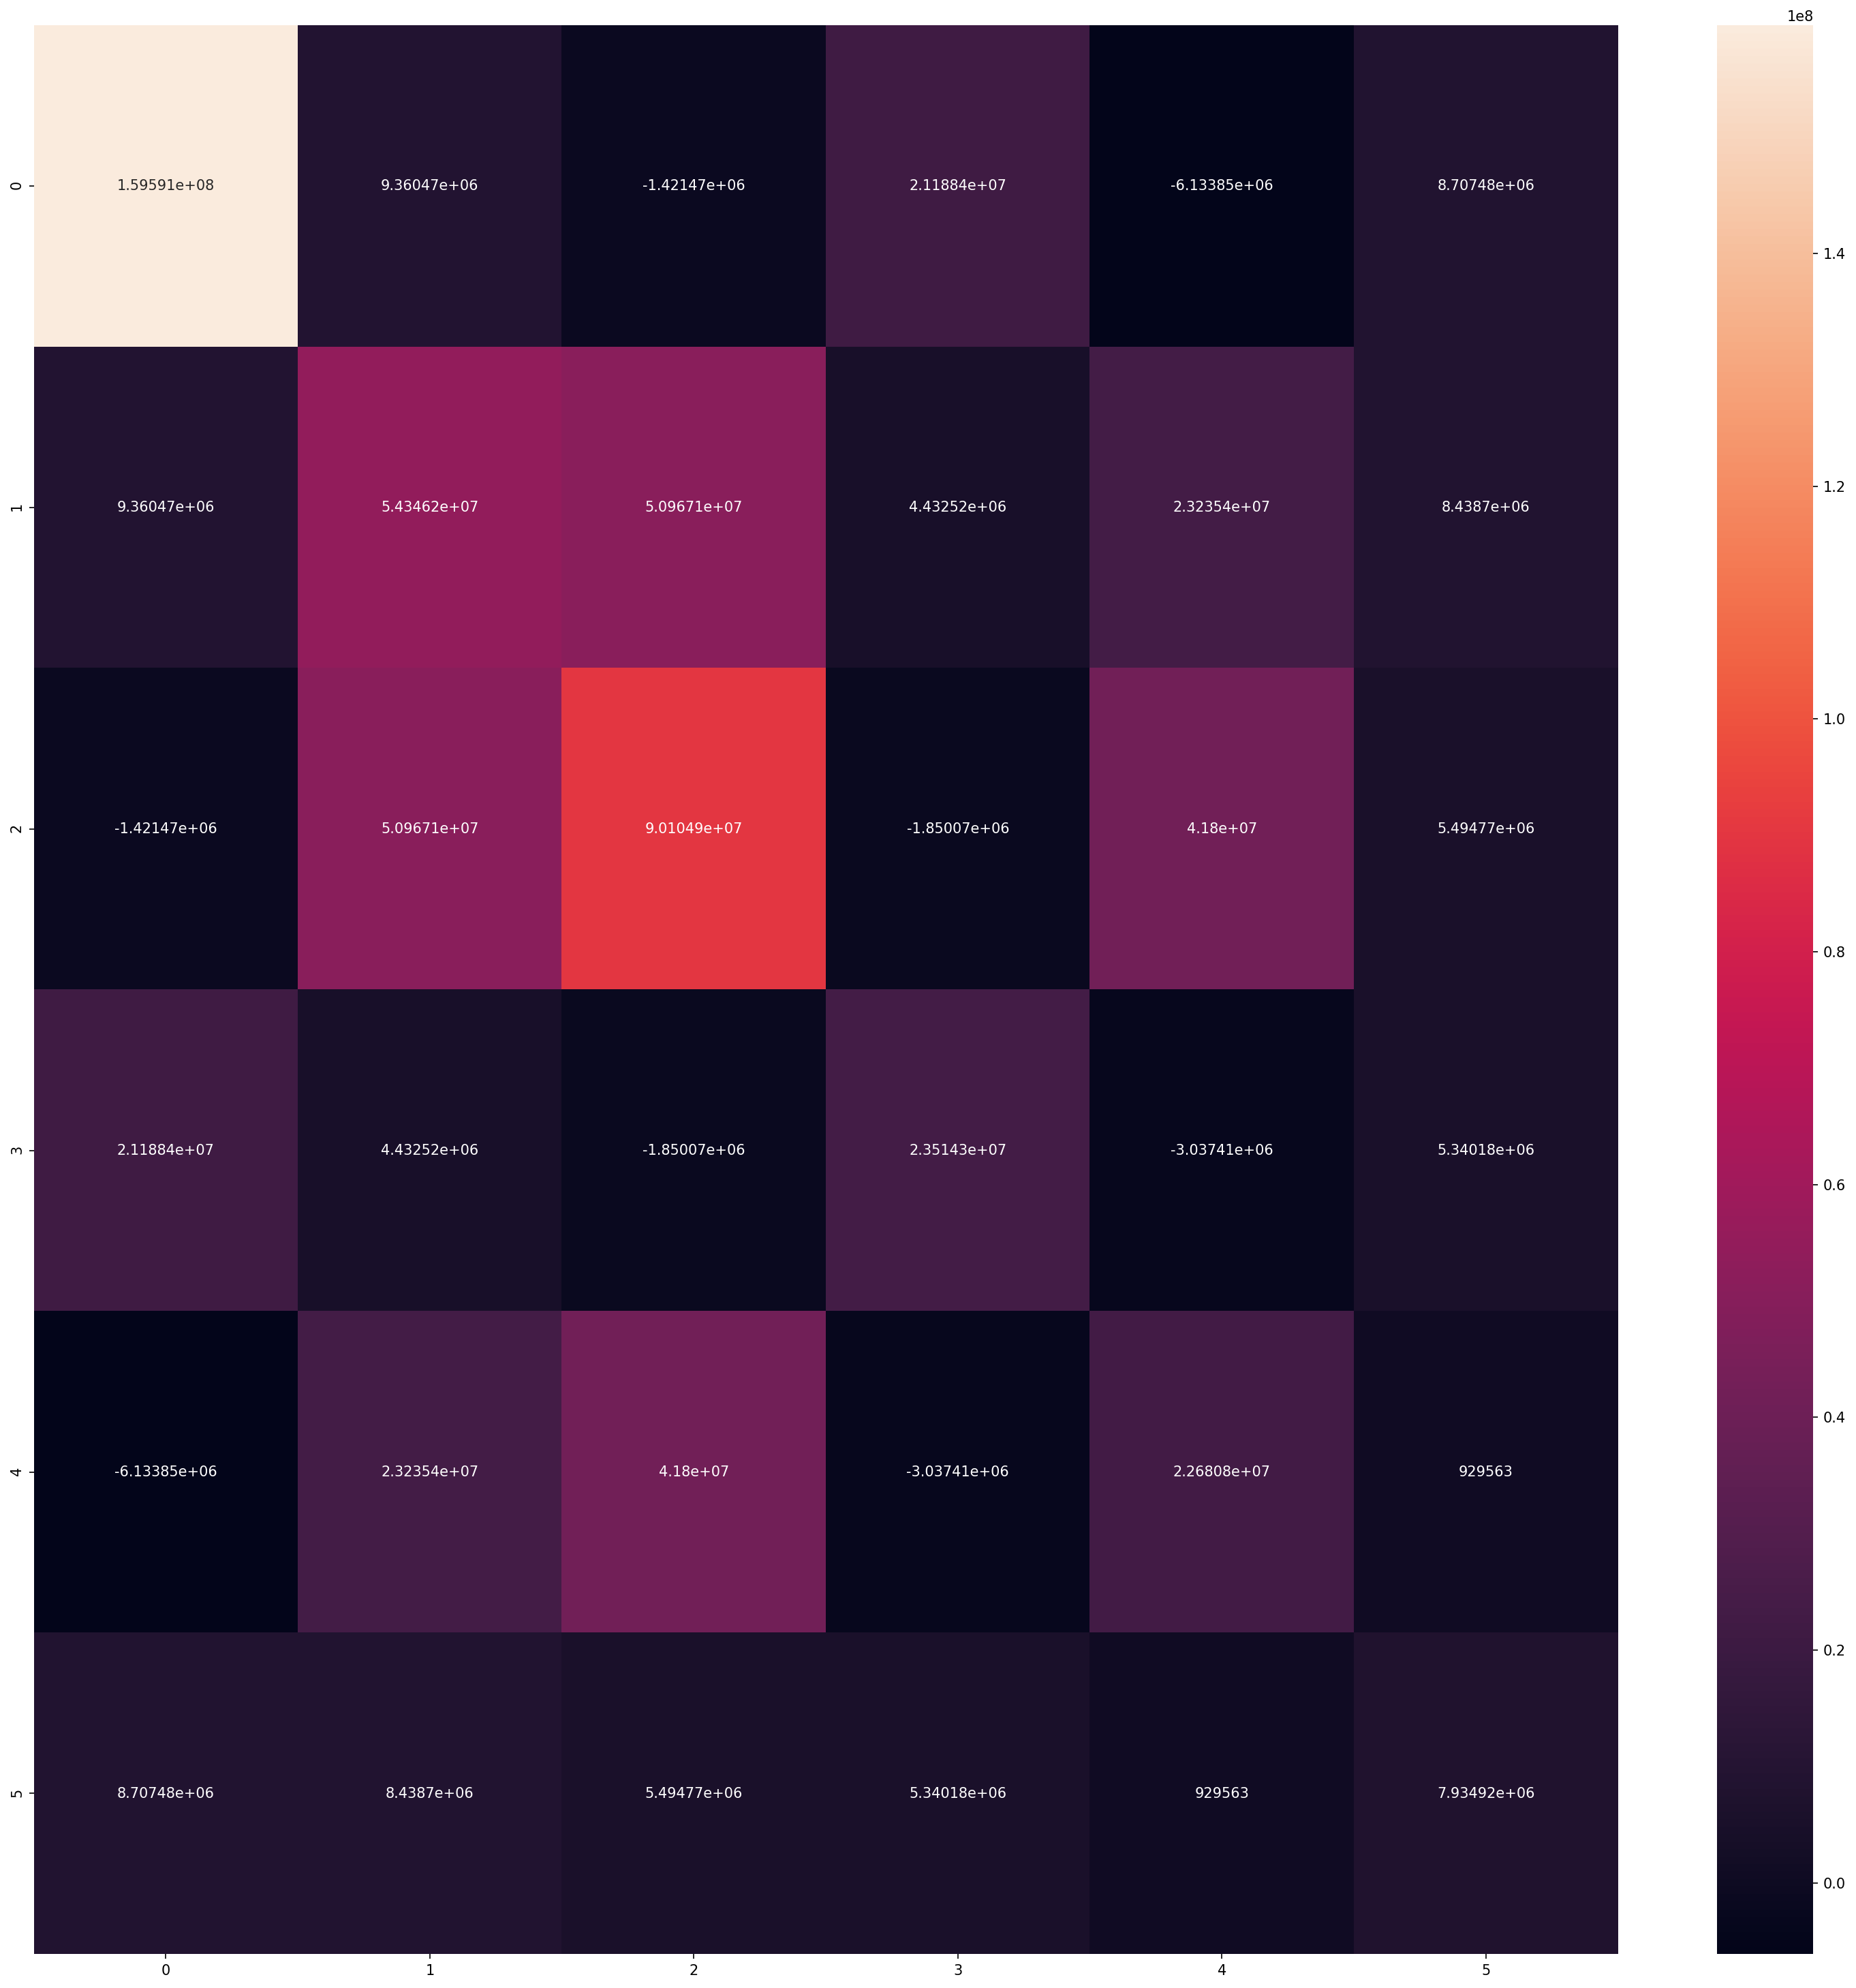

In [35]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(25, 25), dpi=150, facecolor='w', edgecolor='k')
import seaborn as sn
import matplotlib.pyplot as plt
sn.heatmap(covMatrix, annot=True, fmt='g')
plt.show()

In [ ]:
Q1 = Wholesale_data[].quantile(0.25)
Q3 = Wholesale_data[].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

In [84]:
a=-1
IQR_LIST=[]
for data in NUM_FEATS:
    a=a+1
    Q1 = Wholesale_data[f'{data}'].quantile(0.25)
    Q3 = Wholesale_data[f'{data}'].quantile(0.75)
    IQR = Q3 - Q1
    IQR_LIST.append(IQR)
    display(Wholesale_data[f'{data}'].sort_values().head())
    print((Q1 - 1.5 * IQR))
    print((Q3 + 1.5 * IQR))
    display(Wholesale_data[f'{data}'].sort_values().tail())
    
    outlier_down = Wholesale_data[f'{data}'] < (Q1 - 1.5 * IQR)
    outlier_up=Wholesale_data[f'{data}']  > (Q3 + 1.5 * IQR)
    display(Wholesale_data[outlier_down | outlier_up].sort_values(by=[f'{data}']))
    print()
    print()
print (IQR_LIST)

95      3
338     3
66      9
218    18
96     23
Name: Fresh, dtype: int64

-17581.25
37642.75


258     56083
39      56159
284     68951
125     76237
181    112151
Name: Fresh, dtype: int64

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
377,1,3,38793,3154,2648,1034,96,1242
436,1,3,39228,1431,764,4510,93,2346
370,2,3,39679,3944,4955,1364,523,2235
285,1,3,40254,640,3600,1042,436,18
52,2,3,40721,3916,5876,532,2587,1278
129,1,3,42312,926,1510,1718,410,1819
289,1,3,42786,286,471,1388,32,22
29,1,3,43088,2100,2609,1200,1107,823
87,1,3,43265,5025,8117,6312,1579,14351
47,2,3,44466,54259,55571,7782,24171,6465


154     55
98     112
356    134
122    201
97     254
Name: Milk, dtype: int64

-6952.875
15676.125


61     38369
183    43950
85     46197
47     54259
86     73498
Name: Milk, dtype: int64

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
163,2,3,5531,15726,26870,2367,13726,446
38,2,3,4591,15729,16709,33,6956,433
216,2,1,2532,16599,36486,179,13308,674
427,1,3,31012,16687,5429,15082,439,1163
109,2,3,1406,16729,28986,673,836,3
325,1,2,32717,16784,13626,60869,1272,5609
254,1,1,10379,17972,4748,4686,1547,3265
358,1,3,759,18664,1660,6114,536,4100
28,2,3,4113,20484,25957,1158,8604,5206
309,2,2,918,20655,13567,1465,6846,806


75       3
154    137
356    218
275    223
122    245
Name: Grocery, dtype: int64

-10601.125
23409.875


65     45828
47     55571
61     59598
333    67298
85     92780
Name: Grocery, dtype: int64

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
205,2,1,1107,11711,23596,955,9265,710
43,2,3,630,11095,23998,787,9529,72
201,2,1,4484,14399,24708,3549,14235,1681
304,2,2,161,7460,24773,617,11783,2410
28,2,3,4113,20484,25957,1158,8604,5206
343,2,3,1689,6964,26316,1456,15469,37
331,2,2,11223,14881,26839,1234,9606,1102
56,2,3,4098,29892,26866,2616,17740,1340
163,2,3,5531,15726,26870,2367,13726,446
77,2,3,12205,12697,28540,869,12034,1009


420    25
38     33
65     36
57     38
145    42
Name: Frozen, dtype: int64

-3475.75
7772.25


103    18028
196    18711
93     35009
183    36534
325    60869
Name: Frozen, dtype: int64

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
47,2,3,44466,54259,55571,7782,24171,6465
328,1,2,16933,2209,3389,7849,210,1534
195,1,3,17023,5139,5230,7888,330,1755
73,2,3,19899,5332,8713,8132,764,648
371,1,3,20105,1887,1939,8164,716,790
337,1,2,9351,1347,2611,8170,442,868
126,1,3,19219,1840,1658,8195,349,483
230,2,1,11072,5989,5615,8321,955,2137
287,1,3,15354,2102,2828,8366,386,1027
143,1,3,10405,1596,1096,8425,399,318


161    3
75     3
204    5
154    7
356    9
Name: Detergents_Paper, dtype: int64

-5241.125
9419.875


47     24171
65     24231
61     26701
333    38102
85     40827
Name: Detergents_Paper, dtype: int64

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
43,2,3,630,11095,23998,787,9529,72
331,2,2,11223,14881,26839,1234,9606,1102
173,2,3,514,7677,19805,937,9836,716
200,2,1,3067,13240,23127,3941,9959,731
303,2,2,2599,3688,13829,492,10069,59
155,2,3,1989,10690,19460,233,11577,2153
304,2,2,161,7460,24773,617,11783,2410
77,2,3,12205,12697,28540,869,12034,1009
349,2,3,5981,14641,20521,2005,12218,445
319,2,2,9759,25071,17645,1128,12408,1625


109    3
128    3
142    3
187    3
233    7
Name: Delicassen, dtype: int64

-1709.75
3938.25


181     8550
87     14351
71     14472
23     16523
183    47943
Name: Delicassen, dtype: int64

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
358,1,3,759,18664,1660,6114,536,4100
22,1,3,31276,1917,4469,9408,2381,4334
411,1,3,2126,3289,3281,1535,235,4365
145,2,3,22039,8384,34792,42,12591,4430
17,1,3,5876,6157,2933,839,370,4478
36,1,3,29955,4362,5428,1729,862,4626
372,1,3,3884,3801,1641,876,397,4829
45,2,3,5181,22044,21531,1740,7353,4985
384,1,3,10683,21858,15400,3635,282,5120
251,2,1,6134,23133,33586,6746,18594,5121




[13806.0, 5657.25, 8502.75, 2812.0, 3665.25, 1412.0]


In [85]:
display(Wholesale_data)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [88]:
Wholesale_data["Sum"]= Wholesale_data["Fresh"]+Wholesale_data["Milk"]+Wholesale_data["Grocery"]+Wholesale_data["Frozen"]+Wholesale_data["Detergents_Paper"]+Wholesale_data["Delicassen"]

In [97]:
Wholesale_data_sum=Wholesale_data.sort_values(by="Sum", ascending=False).reset_index()

In [98]:
display (Wholesale_data_sum)

,index,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Sum
0,85,2,3,16117,46197,92780,1026,40827,2944,199891
1,47,2,3,44466,54259,55571,7782,24171,6465,192714
2,181,1,3,112151,29627,18148,16745,4948,8550,190169
3,183,1,3,36847,43950,20170,36534,239,47943,185683
4,61,2,3,35942,38369,59598,3254,26701,2017,165881
...,...,...,...,...,...,...,...,...,...,...
435,131,1,3,2101,589,314,346,70,310,3730
436,355,1,3,190,727,2012,245,184,127,3485
437,98,1,3,503,112,778,895,56,132,2476
438,97,1,3,403,254,610,774,54,63,2158


In [104]:
Sumary=Wholesale_data_sum.sum(axis =0, skipna = True)

In [109]:
display(Sumary)

index                  96580
Channel                  582
Region                  1119
Fresh                5280131
Milk                 2550357
Grocery              3498562
Frozen               1351650
Detergents_Paper     1267857
Delicassen            670943
Sum                 14619500
dtype: int64

In [110]:
a=Sumary.loc["Sum"]
print(a)

14619500


In [128]:
sum_items=0
counter=0
for items in Wholesale_data_sum["Sum"].iteritems(): 
    #print(items)
    sum_items=sum_items+items[1]
    counter=counter+1
    #print (sum_items)
    if sum_items>=a*0.8: break
print (sum_items)
print (counter)
print (a)
print(round(counter/len(Wholesale_data_sum)*100,2))

11716673
252
14619500
57.27


#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [ ]:
# Your code here:


In [ ]:
# Your observations here

# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [ ]:
# Your code here

In [ ]:
# Your comment here
# In principle, there are no NAN values and there are many outliers, and there is fo course correlation between the 
# purchases of different kinds among customers.
# None of these factors seems important for the analysis, but it might be important later on
# We will see. 

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [131]:
# Your import here:

from sklearn.preprocessing import StandardScaler

# Your code here:
scaler = StandardScaler()
scaler.fit(Wholesale_data[NUM_FEATS])
scaler.transform(Wholesale_data[NUM_FEATS])
Wholesale_data_scaled=pd.DataFrame(scaler.transform(Wholesale_data[NUM_FEATS]),columns=NUM_FEATS)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train[num_features])
scaler.transform(train[num_features])
pd.DataFrame(scaler.transform(train[num_features]),columns=num_features)

# Challenge 3 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [ ]:
# Your code here:


In [138]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42).fit(Wholesale_data_scaled

In [139]:
kmeans.predict(Wholesale_data_scaled)

array([4, 0, 0, 4, 1, 4, 4, 4, 4, 0, 0, 4, 1, 0, 0, 4, 0, 4, 4, 4, 4, 4,
       1, 0, 0, 4, 4, 4, 0, 1, 4, 4, 4, 1, 4, 0, 1, 0, 0, 1, 1, 4, 0, 0,
       0, 0, 0, 3, 0, 0, 4, 4, 1, 0, 4, 4, 3, 0, 4, 4, 4, 3, 4, 0, 4, 3,
       4, 0, 4, 4, 1, 1, 4, 1, 4, 4, 4, 0, 4, 4, 4, 0, 0, 4, 4, 3, 3, 1,
       4, 1, 4, 4, 3, 1, 0, 4, 4, 4, 4, 4, 0, 0, 4, 1, 4, 4, 0, 0, 4, 0,
       4, 0, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 4, 4, 1, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 4, 4, 0, 4, 4, 4, 1, 4, 4, 4, 4,
       4, 0, 0, 4, 0, 0, 0, 4, 4, 0, 4, 0, 0, 4, 4, 4, 0, 0, 4, 0, 4, 0,
       1, 4, 4, 4, 4, 1, 0, 2, 4, 4, 4, 4, 0, 0, 4, 4, 4, 0, 4, 1, 1, 0,
       4, 4, 0, 0, 1, 4, 4, 0, 4, 4, 4, 0, 4, 3, 4, 4, 0, 0, 0, 4, 0, 4,
       4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 4,
       4, 4, 0, 0, 4, 4, 4, 4, 4, 3, 4, 1, 0, 1, 4, 4, 1, 1, 4, 4, 4, 4,
       0, 0, 0, 4, 0, 4, 4, 4, 4, 1, 4, 4, 1, 1, 4, 4, 4, 4, 1, 1, 1, 1,
       4, 4, 4, 1, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4,

In [144]:
label=kmeans.labels_

In [147]:
Wholesale_data_scaled["label"]=label

In [148]:
display(Wholesale_data_scaled)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,label
0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339,4
1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151,0
2,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293,0
3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411,4
4,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347,1
...,...,...,...,...,...,...,...
435,1.401312,0.848446,0.850760,2.075222,-0.566831,0.241091,1
436,2.155293,-0.592142,-0.757165,0.296561,-0.585519,0.291501,1
437,0.200326,1.314671,2.348386,-0.543380,2.511218,0.121456,0
438,-0.135384,-0.517536,-0.602514,-0.419441,-0.569770,0.213046,4


Count the values in `labels`.

In [ ]:
# Your code here:


# Challenge 4 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [ ]:
# Your code here


Count the values in `labels_DBSCAN`.

In [ ]:
# Your code here


# Challenge 5 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

In [ ]:
# Your code here:


Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

In [ ]:
# Your code here:


Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

In [ ]:
# Your code here:

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [ ]:
# Your code here:


Which algorithm appears to perform better?

In [ ]:
# Your observations here

# Bonus Challenge 2 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

In [ ]:
# Your code here

In [ ]:
# Your comment here

# Bonus Challenge 3 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

In [ ]:
# Your code here

In [ ]:
# Your comment here